In [16]:
from __future__ import print_function, division
import os
from astropy import units
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
CWD = os.getcwd

def generate_uniform_sphere_samples():
    """
        Generate a user-defined latitude angles and longitude angles of points on the celestial sphere.
    """
    u = np.random.uniform(0, 1, size=1)
    v = np.random.uniform(0, 1, size=1)
    # Generate two strings of random numbers that are uniformly distributed from 0 to 1.
    theta = np.arccos(2*u-1)
    # Generate the latitude angle. It must be weighted to avoid getting more points at poles.
    # Change the value interval from 0 ~ pi to -pi / 2 ~ pi / 2.
    phi = 2 * np.pi * v
    # Generate the longitude angle.
    return theta, phi

def P_ani(phi, theta, alpha):
    #the function describing your sky distribution
    norm_const = 1/(4*np.pi*(1+alpha**2))
    b = 1 + (alpha*2*np.sqrt(3)*np.cos(theta))+(3*alpha**2*(np.cos(theta)**2))
    out = norm_const*b
    return out


def generate_dipole_sphere_samples(n_samples, alpha, savetofile=False, fname='none'):
    """
    Generate a user-defined latitude angles and longitude angles of points that are dipole distributed on the celestial
    sphere.

    Parameters:
    :param n_samples:int
                    The number of samples to be generate.
    :param savetofile:bool
                    Choose 'true' or 'false' to decide whether save to file in current directory or not.
    :param fname:string
                    Filename to save as, 'none' if savetofile=false.
    :return:numpy ndarray
                    Table of RA and DEC in radians.
    """
    ltheta = []
    lphi = []
    # Use rejection technique to generate sky direction samples.
    for n in range(0, n_samples):
        judge1 = 0
        # Once judge1 is equal to one, it means that we get a valid sample.
        while judge1 < 1:
            judge2 = np.random.uniform(0, 0.3, size=1)
            theta, phi = generate_uniform_sphere_samples()
            Pani = P_ani(phi, theta, alpha)
            if judge2 < Pani:
                ltheta.append(theta - np.pi / 2), lphi.append(phi)
                judge1 = judge1 + 1

    c = SkyCoord(dec=ltheta * units.radian, ra=lphi * units.radian, frame='icrs')
    ra = c.ra
    ra = ra.wrap_at(180 * units.degree)
    # Wrap the angles at 180 degrees. If you have any questions about this, you can ask Fiona for more details.
    dec = c.dec
    out = np.column_stack([ra.radian, dec.radian])

    if savetofile == True:
        if fname == 'none':
            raise ValueError('Invalid file name')
        else:
            np.savetxt(fname, out)
    else:
        print('Generate {} sky direction samples. '.format(n_samples))

    return out


Generate 2000 sky direction samples. 


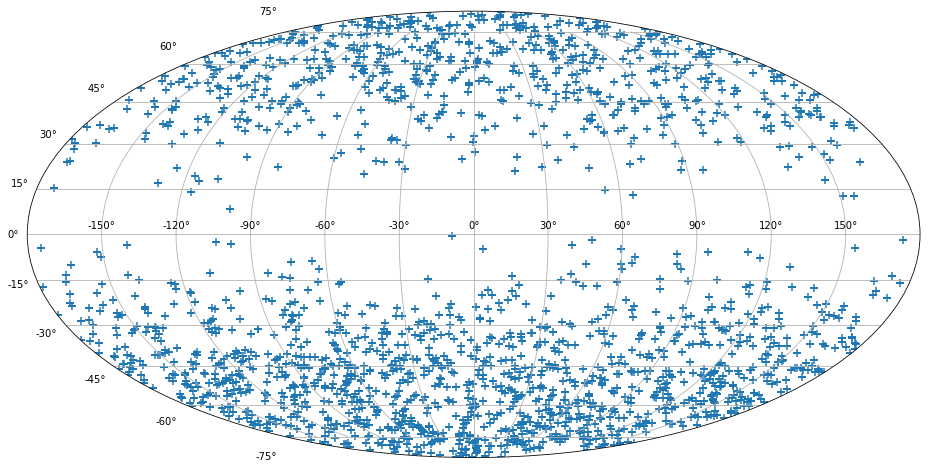

In [22]:
angles = generate_dipole_sphere_samples(2000,5, savetofile=False, fname='anglesout.txt')
# You can change the parameters 2000, -0.2, 0, 0.4 here. 2000 is the number of samples.
# Plot the sky directions generated:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(angles[:, 0], angles[:, 1], marker='+', s=50)
ax.grid(True)
plt.show()